In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


pd.read_csv('https://raw.githubusercontent.com/divyansha1115/Graduate-Admission-Prediction/refs/heads/master/Admission_Predict.csv')

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
395         1              0.82  
396         1              0.84  
397         1              0.91  
398         0              0.67  
399         1              0.95  

[400 rows x 9 columns]

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/divyansha1115/Graduate-Admission-Prediction/refs/heads/master/Admission_Predict.csv')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1    

In [4]:
from ydata_profiling import ProfileReport
import pickle
pf= ProfileReport(df)

In [5]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#pf.to_widgets()

In [7]:
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
395         1              0.82  
396         1              0.84  
397         1              0.91  
398         0              0.67  
399         1              0.95  

[400 rows x 9 columns]

In [8]:
df['GRE Score']= df['GRE Score'].fillna(df['GRE Score'].mean())

In [9]:
df['TOEFL Score']= df['TOEFL Score'].fillna(df['TOEFL Score'].mean())

In [20]:
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mean())

In [21]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

In [22]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [23]:
df.drop(columns=['Serial No.'],inplace=True)

In [24]:
df


GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance of Admit   
0                0.92  
1                0.76  
2                0.72  
3                0.80  
4                0.65  
..                ...  
395              0.82  
396              0.84  
397              0.91  
398              0.67  
399              0.95  

[400 rows x 8 columns]

In [25]:
print(df.columns)


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [26]:
y = df['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [27]:
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [28]:

x= df.drop(columns=['Chance of Admit '])
x

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]

In [29]:
scaler= StandardScaler()
arr = scaler.fit_transform(x)
arr

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [39]:
df1= pd.DataFrame(arr)
print(df1)

            0         1         2         3         4         5         6
0    1.762107  1.746971  0.798829  1.093864  1.167321  1.764818  0.909112
1    0.627656 -0.067635  0.798829  0.596653  1.167321  0.455151  0.909112
2   -0.070467 -0.562528 -0.076600 -0.397769  0.052933 -1.005631  0.909112
3    0.453126  0.427257 -0.076600  0.099442 -1.061454  0.119339  0.909112
4   -0.244998 -0.727492 -0.952029 -1.392191 -0.504260 -0.653029 -1.099975
..        ...       ...       ...       ...       ...       ...       ...
395  0.627656  0.427257 -0.076600  0.099442  0.052933  0.740592  0.909112
396  0.714922 -0.067635 -0.076600 -0.397769  0.052933  0.858126  0.909112
397  1.151249  1.417042  0.798829  1.591075  1.167321  1.429006  0.909112
398 -0.419528 -0.727492 -0.076600  0.099442  0.610127  0.304036 -1.099975
399  1.413045  1.582006  0.798829  1.591075  0.610127  1.781609  0.909112

[400 rows x 7 columns]


In [47]:
df1.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
df1

0         1         2         3         4         5         6
0    1.762107  1.746971  0.798829  1.093864  1.167321  1.764818  0.909112
1    0.627656 -0.067635  0.798829  0.596653  1.167321  0.455151  0.909112
2   -0.070467 -0.562528 -0.076600 -0.397769  0.052933 -1.005631  0.909112
3    0.453126  0.427257 -0.076600  0.099442 -1.061454  0.119339  0.909112
4   -0.244998 -0.727492 -0.952029 -1.392191 -0.504260 -0.653029 -1.099975
..        ...       ...       ...       ...       ...       ...       ...
395  0.627656  0.427257 -0.076600  0.099442  0.052933  0.740592  0.909112
396  0.714922 -0.067635 -0.076600 -0.397769  0.052933  0.858126  0.909112
397  1.151249  1.417042  0.798829  1.591075  1.167321  1.429006  0.909112
398 -0.419528 -0.727492 -0.076600  0.099442  0.610127  0.304036 -1.099975
399  1.413045  1.582006  0.798829  1.591075  0.610127  1.781609  0.909112

[400 rows x 7 columns]

In [49]:
df1.describe()

0             1             2             3             4  \
count  4.000000e+02  4.000000e+02  4.000000e+02  4.000000e+02  4.000000e+02   
mean  -4.174439e-16  5.595524e-16  7.105427e-17  7.993606e-17 -1.332268e-16   
std    1.001252e+00  1.001252e+00  1.001252e+00  1.001252e+00  1.001252e+00   
min   -2.339367e+00 -2.542098e+00 -1.827457e+00 -2.386613e+00 -2.733036e+00   
25%   -7.685900e-01 -7.274920e-01 -9.520286e-01 -8.949798e-01 -5.042604e-01   
50%    1.679859e-02 -6.763531e-02 -7.660001e-02  9.944220e-02  5.293342e-02   
75%    7.149218e-01  7.571856e-01  7.988286e-01  5.966532e-01  6.101273e-01   
max    2.023903e+00  2.076899e+00  1.674257e+00  1.591075e+00  1.724515e+00   

                  5             6  
count  4.000000e+02  4.000000e+02  
mean   7.771561e-16 -3.996803e-17  
std    1.001252e+00  1.001252e+00  
min   -3.020504e+00 -1.099975e+00  
25%   -7.201909e-01 -1.099975e+00  
50%    1.859559e-02  9.091117e-01  
75%    7.783704e-01  9.091117e-01  
max    2.218165e+00  9.091117e-01

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif_df = pd.DataFrame ()
arr= df1.values
arr

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [52]:
arr.shape[1]

7

In [53]:
vif_df = pd.DataFrame ()
arr= df1.values
vif_df['vif'] = [variance_inflation_factor(arr,i) for i in range (arr.shape[1])]


In [54]:
vif_df

vif
0  4.615516
1  4.288959
2  2.919606
3  3.075504
4  2.431258
5  5.207403
6  1.543312

In [55]:
vif_df = pd.DataFrame ()
arr= df1.values
vif_df['feature']= x.columns
#vif_df = pd.DataFrame({
 
#'feature': x.columns,
 #   'vif': [variance_inflation_factor(arr, i) for i in range(arr.shape[1])]
#})


In [56]:
vif_df

feature
0          GRE Score
1        TOEFL Score
2  University Rating
3                SOP
4               LOR 
5               CGPA
6           Research

In [57]:

arr



array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [58]:
print("x.columns:", x.columns)
print("len(x.columns):", len(x.columns))
print("vif_df1.shape:", vif_df.shape)


x.columns: Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')
len(x.columns): 7
vif_df1.shape: (7, 1)


In [66]:
vif_df

feature
0          GRE Score
1        TOEFL Score
2  University Rating
3                SOP
4               LOR 
5               CGPA
6           Research

In [73]:
x_train,x_test,y_train,y_test=train_test_split(arr,y,test_size=0.15,random_state =345)

In [75]:
x_train

array([[-1.81577487, -1.38734873, -0.95202863, ..., -1.06145431,
        -0.95525937, -1.09997489],
       [-0.85585544, -0.8924562 , -0.07660001, ..., -0.50426044,
        -0.5522849 , -1.09997489],
       [-0.41952842, -1.38734873, -1.82745726, ..., -2.17584203,
        -0.98884057,  0.90911166],
       ...,
       [-0.59405923, -0.8924562 , -0.07660001, ...,  0.61012728,
        -0.97204997,  0.90911166],
       [ 0.4531256 ,  1.25207811,  1.67425725, ...,  1.16732114,
         1.2778908 ,  0.90911166],
       [ 1.67484124,  1.91193482,  1.67425725, ...,  0.05293342,
         2.01667732,  0.90911166]])

In [77]:
lr = LinearRegression()

In [79]:
lr.fit( x_train,y_train )

LinearRegression()

In [81]:
pickle.dump(lr,open('admission_lr_model.pickle','wb'))

In [83]:
!ls
#model is created in pickle format

#                               knnusingcustomersegmentation.py
Create                          linear_file_sav
LinearRegressionpw.py           lrlinearreression.ipynb
Untitled.ipynb                  main.py
Untitled1.ipynb                 myenv
a                               needed
admission_lr_model.pickle       new
advertising.html                pandas.py
basic.py                        pandas1.py
basicandconditional.py          report.html
environment                     tempCodeRunnerFile.py
get-pip.py                      test
if                              time.py
kmean.py                        virtual
knearstneighbour.py


In [85]:
lr.predict([[337,118,4,4.5,4.5,9.65,1]])

array([11.05322552])

In [87]:

df


GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance of Admit   
0                0.92  
1                0.76  
2                0.72  
3                0.80  
4                0.65  
..                ...  
395              0.82  
396              0.84  
397              0.91  
398              0.67  
399              0.95  

[400 rows x 8 columns]

In [89]:

test1 =scaler.transform([[324	,107	,4	,4.0	,4.5	,8.87,1]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [91]:
lr.predict(test1)

array([0.80376775])

In [93]:
model = pickle.load(open ('admission_lr_model.pickle','rb'))

In [95]:
model.predict(test1)

array([0.80376775])

In [97]:
lr.score(x_test,y_test)

0.7396066774631338

In [99]:
print (x_test)
print("test data for y_test")
print (y_test)

[[ 4.53125604e-01  1.08711393e+00  1.67425725e+00  1.09386422e+00
   6.10127278e-01  5.72685484e-01  9.09111664e-01]
 [ 2.78594798e-01  9.22149753e-01 -9.52028634e-01 -1.39219083e+00
  -1.06145431e+00  6.89674008e-02  9.09111664e-01]
 [-1.72850946e+00 -1.55231291e+00 -9.52028634e-01 -8.94979818e-01
  -5.04260444e-01 -1.55972107e+00 -1.09997489e+00]
 [-1.46671326e+00 -1.22238456e+00 -7.66000050e-02 -1.39219083e+00
  -5.04260444e-01  1.02548606e-01  9.09111664e-01]
 [ 1.06398342e+00  5.92221398e-01  7.98828624e-01  1.09386422e+00
   6.10127278e-01  1.05961296e+00  9.09111664e-01]
 [ 8.89452617e-01  9.22149753e-01 -7.66000050e-02  9.94422020e-02
  -5.04260444e-01  1.02548606e-01  9.09111664e-01]
 [ 2.78594798e-01  9.73288648e-02 -7.66000050e-02  9.94422020e-02
   6.10127278e-01 -2.66844654e-01  9.09111664e-01]
 [-7.04668127e-02 -1.05742038e+00 -9.52028634e-01 -8.94979818e-01
  -1.61864817e+00 -4.68331887e-01  9.09111664e-01]
 [-7.68590034e-01 -5.62527846e-01 -9.52028634e-01 -8.94979818e-0

In [101]:
# Let's create a function to create adjusted R-Squared

def adj_r2(x,y):
  r2 = lr.score(x,y)
  n = x. shape [0]
  p = x. shape [1]
  adjusted_r2 = 1- (1-r2) *(n-1) /(n-p-1)
  return adjusted_r2

In [103]:
adj_r2(x_test,y_test)


0.7045537301985556

In [111]:
from sklearn.pipeline import make_pipeline

# Pipeline: Scale the data first, then apply LassoCV
lassocv = make_pipeline(
    StandardScaler(),
    LassoCV(cv=10, max_iter=2000000)
)

print(lassocv.fit(x_train, y_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv', LassoCV(cv=10, max_iter=2000000))])


In [113]:
lassocv = LassoCV(cv=10, max_iter= 2000000)
print(lassocv)
lassocv.fit(x_train,y_train)
print(lassocv)


LassoCV(cv=10, max_iter=2000000)
LassoCV(cv=10, max_iter=2000000)


In [115]:

lassocv.alpha_#this is not for pipeline but can only be run when lassocv is runned without using pipeline

0.0010272871141871417

In [117]:
lasso= Lasso(alpha=lassocv. alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.0010272871141871417)

In [119]:
lasso.score(x_train,y_train)



0.8135777274842384

In [151]:
lasso.score(x_test,y_test)


0.7396589394287891

In [162]:

print(df1.columns)
# Reload the dataset with correct header
df1 = pd.read_csv('https://raw.githubusercontent.com/divyansha1115/Graduate-Admission-Prediction/refs/heads/master/Admission_Predict.csv')
print(df1.columns)


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


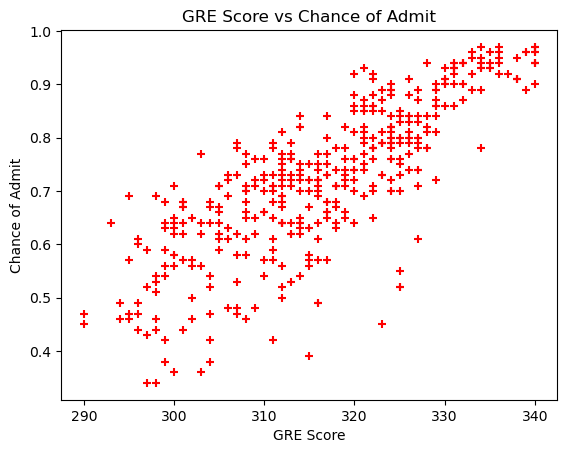

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

# Scatter plot with corrected column names
plt.scatter(df1['GRE Score'], df1['Chance of Admit '], color="red", marker="+")
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs Chance of Admit')
plt.show()


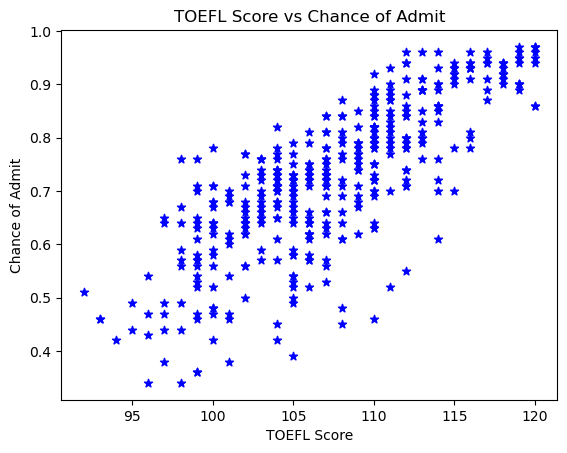

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

# Scatter plot with corrected column names
plt.scatter(df1['TOEFL Score'], df1['Chance of Admit '], color="blue", marker="*")
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score vs Chance of Admit')
plt.show()
